In [1]:
import os,sys,csv,re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from umi_tools._dedup_umi import edit_distance
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [3]:
def str2array(s):
    a,b= s.split('\t')[:2]
    return (a,int(b))
def merge_edit_1(counts):
    keep,collapse = [],counts[0:]
    while len(collapse)>0:
        ref = list(collapse[0]) # need to convert to list here otherwise will keep updating the value to new_cluster
        temp = []
        for s in collapse[1:]:
            s1 = ref[0]
            s2 = s[0]
            if abs(len(s1)-len(s2))<=1 and edit_distance(s1.encode('utf-8'),s2.encode('utf-8'))<2:
                ref[-1] += s[-1]
            else:
                temp.append(s)
        keep.append(ref)
        collapse = temp[0:]
    return np.array(keep,dtype=object)
def gen_min_edit(barcodes,array):
    temp=[]
    for a in array:
        temp.append(min([edit_distance(a.encode('utf-8'),s.encode('utf-8')) for s in barcodes if len(a) >1 ]))
    return temp
matplotlib.rcParams['font.family'] = 'Helvetica'

# Get the overall editing efficiency over time

In [4]:
plt_order = ['Chir-1d-Dox', 'Chir-2d-Dox','Chir-3d-Dox',
 'Dox-1d-Chir', 'Dox-2d-Chir', 'Dox-3d-Chir']

## Serial

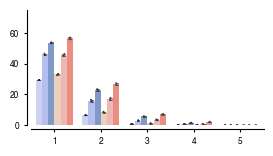

In [5]:
path  = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('GTT','Dox'),('ACA','Wnt')],columns = ['barcode','Sample'])
df = pd.DataFrame(columns= ['Position','ratio','rep','condition'])
con = 'serial'
for day in days:
    for i in range(1,4):
        test = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t').merge(ref).groupby('Position').sum(numeric_only=True).reset_index()
        test['rep']='rep'+str(i)
        test['condition']= conds[0] + '-' + day + '-'+  conds[1]
        test2 = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t').merge(ref).groupby('Position').sum(numeric_only=True).reset_index()
        test2['rep']='rep'+str(i)
        test2['condition']= conds[1] + '-' + day + '-'+  conds[0]
        df = pd.concat([df,test],axis=0)
        df = pd.concat([df,test2],axis=0)
        
df = df.reset_index(drop=True)
fig, axs = fig, axs = plt.subplots(1,1,figsize=(3,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df,x='Position',y='ratio',hue='condition', \
              palette=['#C7CEF6','#ACB7F8','#7496D2','#F5CDB6','#F7B0AA','#FB8072','#FDDDA4','#76A08A'],\
              hue_order=plt_order,errwidth=0.5, errorbar='sd', capsize=0.06, ax=axs)
sns.stripplot(data=df, x="Position", y='ratio', hue="condition",hue_order=plt_order,dodge=True,palette='dark:#4A4A4A',marker='.',size=2.5,ax=axs)

g.legend_.remove()

sns.despine(offset=3,top=True,right=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.set_ylim(0,75)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure4/fig/DTT_serial_edit_eff.pdf')

## Layered

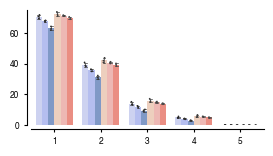

In [6]:
path  = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('GTT','Dox'),('ACA','Wnt')],columns = ['barcode','Sample'])
df = pd.DataFrame(columns= ['Position','ratio','rep','condition'])
con = 'layered'
for day in days:
    for i in range(1,4):
        test = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t').merge(ref).groupby('Position').sum(numeric_only=True).reset_index()
        test['rep']='rep'+str(i)
        test['condition']= conds[0] + '-' + day + '-'+  conds[1]
        test2 = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t').merge(ref).groupby('Position').sum(numeric_only=True).reset_index()
        test2['rep']='rep'+str(i)
        test2['condition']= conds[1] + '-' + day + '-'+  conds[0]
        df = pd.concat([df,test],axis=0)
        df = pd.concat([df,test2],axis=0)
        
df = df.reset_index(drop=True)
fig, axs = plt.subplots(1,1,figsize=(3,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df,x='Position',y='ratio',hue='condition', \
              palette=['#C7CEF6','#ACB7F8','#7496D2','#F5CDB6','#F7B0AA','#FB8072','#FDDDA4','#76A08A'],\
              hue_order=plt_order,errwidth=0.5, errorbar='sd', capsize=0.06, ax=axs)
sns.stripplot(data=df, x="Position", y='ratio', hue="condition",hue_order=plt_order,dodge=True,palette='dark:#4A4A4A',marker='.',size=2.5,ax=axs)

g.legend_.remove()

sns.despine(offset=3,top=True,right=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.set_ylim(0,75)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure4/fig/DTT_layered_edit_eff.pdf')

## Pulse

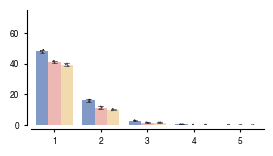

In [8]:
path = '../Figure4/pulse/'
samples = np.unique(sorted([s.split('_')[0] for s in os.listdir(path) if '.csv' in s and 'pulse' in s]))
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('GTT','Dox'),('ACA','Wnt')],columns = ['barcode','Sample'])
df = pd.DataFrame(columns= ['Position','ratio','rep','condition'])
for samp in samples:
    for i in range(1,4):
        test = pd.read_csv(path + samp + '_rep'+str(i)+'_bc_count.csv',sep='\t').merge(ref).groupby('Position').sum(numeric_only=True).reset_index()
        test['rep']='rep'+str(i)
        test['condition']= samp.split('-')[-2]
        df = pd.concat([df,test],axis=0)

df = df.reset_index(drop=True)
fig, axs = fig, axs = plt.subplots(1,1,figsize=(3,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df,x='Position',y='ratio',hue='condition', \
              palette=['#7496D2','#F7B0AA','#FDDDA4','#76A08A'],\
              errwidth=0.5, errorbar='sd', capsize=.1, ax=axs)
sns.stripplot(data=df, x="Position", y='ratio', hue="condition",dodge=True,palette='dark:#4A4A4A',marker='.',size=2.5,ax=axs)

g.legend_.remove()

sns.despine(offset=3,top=True,right=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.set_ylim(0,75)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure4/fig/DTT_pulse_edit_eff.pdf')

# Get the order ratio

## Serial

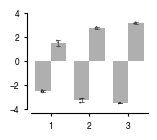

In [9]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])
df = pd.DataFrame(columns= ['day','rep','condition','ratio'])
con = 'serial'
for day in days:
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = temp[temp['Position']!='1to3'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index()
        test = pd.DataFrame((int(day[0]), 'rep'+str(i), conds[0] + '-'+  conds[1], \
                             np.log2(float(temp.loc[(temp['Sample']=='Dox2Wnt'),'count'].iloc[0]+1)/\
                                     float(temp.loc[(temp['Sample']=='Wnt2Dox'),'count'].iloc[0]+1))),\
                                      index= ['day','rep','condition','ratio']).T
        
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')        
        temp = temp[temp['Position']!='1to3'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index()
        test2 = pd.DataFrame((int(day[0]), 'rep'+str(i), conds[1] + '-' +  conds[0], \
                             np.log2(float(temp.loc[(temp['Sample']=='Dox2Wnt'),'count'].iloc[0]+1)/\
                                     float(temp.loc[(temp['Sample']=='Wnt2Dox'),'count'].iloc[0]+1))),\
                                      index= ['day','rep','condition','ratio']).T
        df = pd.concat([df,test],axis=0)
        df = pd.concat([df,test2],axis=0)

df = df.reset_index(drop=True)
df['day'] =  df['day'].astype('category')
fig, axs = fig, axs = plt.subplots(1,1,figsize=(1.5,1.25),sharey=False,sharex=False)
g=sns.barplot(data=df,x='day',y='ratio',hue='condition', palette=['#AFAFAF','#AFAFAF'],\
              errwidth=0.5, errorbar='sd', capsize=.1, ax=axs)
sns.stripplot(data=df, x="day", y='ratio', hue="condition",dodge=True,palette='dark:#4A4A4A',marker='.',size=2.5,ax=axs)

g.legend_.remove()
sns.despine(offset=3)#,bottom=True,top=False,right=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.set_ylim(-4,4)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#g.axes.xaxis.set_ticks_position("bottom")

#plt.savefig('../Figure4/fig/DTT_serial_order.pdf')

## Layered

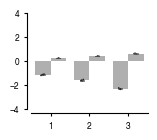

In [10]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])
df = pd.DataFrame(columns= ['day','rep','condition','ratio'])
con = 'layered'
for day in days:
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = temp[temp['Position']!='1to3'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index()
        test = pd.DataFrame((int(day[0]), 'rep'+str(i), conds[0] + '-'+  conds[1], \
                             np.log2(float(temp.loc[(temp['Sample']=='Dox2Wnt'),'count'].iloc[0]+1)/\
                                     float(temp.loc[(temp['Sample']=='Wnt2Dox'),'count'].iloc[0]+1))),\
                                      index= ['day','rep','condition','ratio']).T
        
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')        
        temp = temp[temp['Position']!='1to3'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index()
        test2 = pd.DataFrame((int(day[0]), 'rep'+str(i), conds[1] + '-' +  conds[0], \
                             np.log2(float(temp.loc[(temp['Sample']=='Dox2Wnt'),'count'].iloc[0]+1)/\
                                     float(temp.loc[(temp['Sample']=='Wnt2Dox'),'count'].iloc[0]+1))),\
                                      index= ['day','rep','condition','ratio']).T
        df = pd.concat([df,test],axis=0)
        df = pd.concat([df,test2],axis=0)

df = df.reset_index(drop=True)
df['day'] =  df['day'].astype('category')
fig, axs = fig, axs = plt.subplots(1,1,figsize=(1.5,1.25),sharey=False,sharex=False)
g=sns.barplot(data=df,x='day',y='ratio',hue='condition', palette=['#AFAFAF','#AFAFAF'],\
              errwidth=0.5, errorbar='sd', capsize=.1, ax=axs)
sns.stripplot(data=df, x="day", y='ratio', hue="condition",dodge=True,palette='dark:#4A4A4A',marker='.',size=2.5,ax=axs)

g.legend_.remove()
sns.despine(offset=3)#,bottom=True,top=False,right=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.set_ylim(-4,4)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#g.axes.xaxis.set_ticks_position("bottom")

#plt.savefig('../Figure4/fig/DTT_layered_order.pdf')

## Pulse

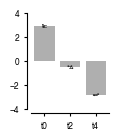

In [11]:
path = '../Figure4/pulse/'
samples = np.unique(sorted([s.split('_')[0] for s in os.listdir(path) if '.csv' in s and 'pulse' in s]))
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])
df = pd.DataFrame(columns= ['day','rep','condition','ratio'])
for samp in samples:
    for i in range(1,4):
        temp = pd.read_csv(path + samp + '_rep'+str(i)+'_bc_count.csv',sep='\t').merge(ref)
        temp = temp[temp['Position']!='1to3'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index()
        test = pd.DataFrame((samp.split('-')[-2], 'rep'+str(i), conds[0] + '-'+  conds[1], \
                             np.log2(float(temp.loc[(temp['Sample']=='Dox2Wnt'),'count'].iloc[0]+1)/\
                                     float(temp.loc[(temp['Sample']=='Wnt2Dox'),'count'].iloc[0]+1))),\
                            index= ['day','rep','condition','ratio']).T
        df = pd.concat([df,test],axis=0)
        
fig, axs = fig, axs = plt.subplots(1,1,figsize=(1,1.25),sharey=False,sharex=False)
df = df.reset_index(drop=True)
g=sns.barplot(data=df,x='day',y='ratio',hue='condition', palette=['#AFAFAF'],\
              errwidth=0.5, errorbar='sd', capsize=.1, ax=axs)
sns.stripplot(data=df, x="day", y='ratio', hue="condition",dodge=True,palette='dark:#4A4A4A',marker='.',size=2.5,ax=axs)

g.legend_.remove()
sns.despine(offset=3,top=True,right=True)
axs.set_xlabel('')
axs.set_ylabel('')
axs.set_ylim(-4,4)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure4/fig/DTT_pulse_order.pdf')

# Bigram map

## Serial Chir-dox

0.5009766310614593 0.5009766310614606
0.7200845448570596 0.720084544857059
0.07040072691171488 0.07040072691171151


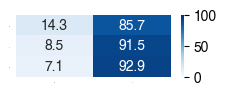

In [12]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])

con = 'serial'
k=0
matrix = np.zeros((3,2))
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT+ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA+GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox2Wnt']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt2Dox']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2.5,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[0]}_{conds[1]}_bigram_raw.pdf')

## Serial dox-chir

2.56656449654735 2.566564496547352
0.6793628646746226 0.6793628646746236
0.3330507097205395 0.3330507097205415
[[73.64301073 26.35698927]
 [87.6182758  12.3817242 ]
 [90.45465531  9.54534469]]


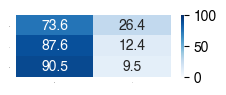

In [13]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])

con = 'serial'
k=0
matrix = np.zeros((3,2))
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT+ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA+GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox2Wnt']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt2Dox']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
print (matrix)
fig, axs = plt.subplots(1,1,figsize=(2.5,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[1]}_{conds[0]}_bigram_raw.pdf')

## Layered chir-dox

0.6088574633813457 0.6088574633813482
0.4043368158793666 0.4043368158793654
0.39036696842245894 0.39036696842246144


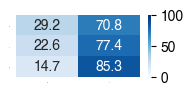

In [14]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])

con = 'layered'
matrix = np.zeros((3,2))
k=0
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT+ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA+GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox2Wnt']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt2Dox']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[0]}_{conds[1]}_bigram_raw.pdf')

## Layered dox-chir

0.07213901664510115 0.07213901664509857
0.26219038473913686 0.26219038473913686
0.2997787749337148 0.2997787749337106


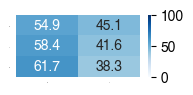

In [15]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])

con = 'layered'
matrix = np.zeros((3,2))
k=0
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT+ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA+GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox2Wnt']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt2Dox']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)
axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[1]}_{conds[0]}_bigram_raw.pdf')

## Pulse

0.5351794397966272 0.5351794397966275
1.6410689710663902 1.6410689710663877
0.1345288565860922 0.13452885658608815
[[89.16263504 10.83736496]
 [41.23427405 58.76572595]
 [11.4223655  88.5776345 ]]


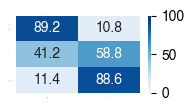

In [16]:
path = '../Figure4/pulse/'
samples = np.unique(sorted([s.split('_')[0] for s in os.listdir(path) if '.csv' in s and 'pulse' in s]))
ref = pd.DataFrame([('ACA+GTT','Wnt2Dox'),('GTT+ACA','Dox2Wnt')],columns = ['barcode','Sample'])

matrix = np.zeros((3,2))
k=0
for samp in samples:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + samp + '_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT+ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA+GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox2Wnt']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt2Dox']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
print (matrix)

fig, axs = plt.subplots(1,1,figsize=(2,1),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig('../Figure4/fig/DTT_pulse_bigram_raw.pdf')

# Unigram

## Serial Chir-dox

0.2649754870991562 0.2649754870991524
0.46253951307294316 0.4625395130729458
0.40176211276235035 0.4017621127623519


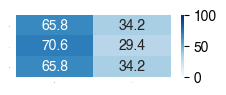

In [17]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA','Wnt'),('GTT','Dox')],columns = ['barcode','Sample'])

con = 'serial'
k=0
matrix = np.zeros((3,2))
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)  
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2.5,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[0]}_{conds[1]}_unigram_raw.pdf')

## Serial dox-chir

0.34092146689618935 0.3409214668961896
0.5755593729692107 0.5755593729692062
0.3269817457709155 0.3269817457709163


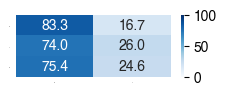

In [18]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA','Wnt'),('GTT','Dox')],columns = ['barcode','Sample'])

con = 'serial'
k=0
matrix = np.zeros((3,2))
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2.5,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[1]}_{conds[0]}_unigram_raw.pdf')

## Layered chir-dox

0.04207589311629331 0.042075893116292624
0.22276133928013944 0.22276133928013725
0.22740052521306553 0.22740052521306814


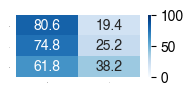

In [19]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA','Wnt'),('GTT','Dox')],columns = ['barcode','Sample'])

con = 'layered'
matrix = np.zeros((3,2))
k=0
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[0]}_{conds[1]}_unigram_raw.pdf')

## Layered dox-chir

0.36426553072848933 0.36426553072848716
0.172518379782952 0.17251837978295403
0.15273930218239248 0.15273930218239312


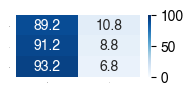

In [20]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
ref = pd.DataFrame([('ACA','Wnt'),('GTT','Dox')],columns = ['barcode','Sample'])

con = 'layered'
matrix = np.zeros((3,2))
k=0
for day in days:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2,0.8),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)
axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig(f'../Figure4/fig/DTT_{con}_{conds[1]}_{conds[0]}_unigram_raw.pdf')

## Pulse

1.4777559359389958 1.4777559359389987
3.4301811633607646 3.4301811633607624
1.865785687748388 1.8657856877483836


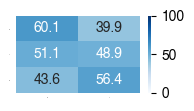

In [21]:
path = '../Figure4/pulse/'
samples = np.unique(sorted([s.split('_')[0] for s in os.listdir(path) if '.csv' in s and 'pulse' in s]))
ref = pd.DataFrame([('ACA','Wnt'),('GTT','Dox')],columns = ['barcode','Sample'])

matrix = np.zeros((3,2))
k=0
for samp in samples:
    a,b = [],[]
    for i in range(1,4):
        temp = pd.read_csv(path + samp + '_rep'+str(i)+'_bc_count.csv',sep='\t')
        temp = pd.concat((temp[temp['barcode']=='GTT'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index(),\
                          temp[temp['barcode']=='ACA'].merge(ref).groupby('Sample').sum(numeric_only=True).reset_index())).reset_index(drop=True)
        temp['ratio']=temp['count']/temp['count'].sum()
        a.append(temp[temp['Sample']=='Dox']['ratio'][0])
        b.append(temp[temp['Sample']=='Wnt']['ratio'][1])
    matrix[k,0] = np.mean(a)*100
    matrix[k,1] = np.mean(b)*100
    print (np.std(a)*100,np.std(b)*100)
    k+=1
fig, axs = plt.subplots(1,1,figsize=(2,1),sharey=False,sharex=False)
sns.heatmap(matrix, annot=True,vmax=100,vmin=0,cmap='Blues', fmt='.1f',ax=axs)

sns.despine(offset=3,left=True, bottom=True)

axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0, length=0,labelsize=0)
axs.xaxis.set_tick_params(width=0, length=0,labelsize=0)
#plt.savefig('../Figure4/fig/DTT_pulse_unigram_raw.pdf')

# PCA

In [22]:
path = '../Figure4/DTT/'
days  = ['1d','2d','3d']
conds = ['Chir', 'Dox']
## additional Wnt-dox expect to be negative
con = 'layered'
test = []
name = []
for day in days:
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        test.append(list(temp['ratio']))
        name.append(con+'-'+conds[0] + '-' + day + '-'+conds[1]) # +'_rep'+str(i)
        
for day in days:
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        test.append(list(temp['ratio']))
        name.append(con+'-'+conds[1] + '-' + day + '-'+conds[0])
con = 'serial'
 
for day in days:
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[0] + '-' + day + '-'+ \
                           conds[1]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        test.append(list(temp['ratio']))
        name.append(con+'-'+conds[0] + '-' + day + '-'+conds[1])
        
for day in days:
    for i in range(1,4):
        temp = pd.read_csv(path + '293T-TAPE-'+con+'-'+conds[1] + '-' + day + '-'+ \
                           conds[0]+'_rep'+str(i)+'_bc_count.csv',sep='\t')
        test.append(list(temp['ratio']))
        name.append(con+'-'+conds[1] + '-' + day + '-'+conds[0])
        
cname = temp['barcode']+'+'+temp['Position']
path = '../Figure4/pulse/'
samples = np.unique(sorted([s.split('_')[0] for s in os.listdir(path) if '.csv' in s and 'pulse' in s]))
for samp in samples:
    for i in range(1,4):
        temp = pd.read_csv(path + samp + '_rep'+str(i)+'_bc_count.csv',sep='\t')
        test.append(list(temp['ratio']))
        name.append('-'.join([samp.split('-')[idx] for idx in [2,4]]))

In [23]:
df=pd.DataFrame(test,columns=cname,index=name).fillna(0)
scaler = StandardScaler()
scaler.fit(df)
order_rec = scaler.transform(df)
pca = PCA(n_components=5)
pca.fit(order_rec)
pca_bcancer = pca.transform(order_rec)
PC1 = pca_bcancer[:,0]
PC2 = pca_bcancer[:,1]
PC3 = pca_bcancer[:,2]
zipped = list(zip(PC1, PC2,PC3,df.index,df.index.str.split('-').str[1]))
zipped = list(zip(PC1, PC2,PC3,df.index))

pc_df = pd.DataFrame(zipped, 
                     columns=['PC1', 
                              'PC2','PC3','sample'])
pc_df['reps'] = ['rep1','rep2','rep3']*15#15

In [24]:
pca.explained_variance_ratio_[0:3]

array([0.45776621, 0.25416191, 0.18456537])

In [25]:
df_A,df_B = pc_df.pivot(index='sample',columns='reps')['PC1'],pc_df.pivot(index='sample',columns='reps')['PC2']
df_new = pd.DataFrame((df_A.mean(axis=1),df_A.std(axis=1),df_B.mean(axis=1),df_B.std(axis=1))).T.reset_index()
df_new.columns = ['val','A_mean','A_std','B_mean','B_std']

In [26]:
import plotly.io as pio
import plotly
import plotly.graph_objs as go
import plotly.offline as pyo
plotly.offline.init_notebook_mode(connected=True)
pio.templates.default = "plotly_white"  # Example: Change to the "plotly_dark" theme
colors = ['#10CF00',  '#FF4D4D','#4D64FF',
          '#FF6F6F',  '#00AAFF','#D0B840',
          '#00AACC', '#FF4D4D', '#FFA34D',
          '#FFB07C', '#8A4EAD', '#1FA07C',
          '#A54F5E', '#78A355', '#7FAFF7']
traces = []
for group, color in zip(pc_df['sample'].unique(),colors):
    group_data = pc_df[pc_df['sample'] == group]
    trace = go.Scatter3d(
        x=group_data['PC1'],
        y=group_data['PC2'],
        z=group_data['PC3'],
        mode='markers',
        marker=dict(size=5, color=color),
        name=group
    )
    traces.append(trace)

# Create a layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(
            title='PC1: 46%',
            tickfont=dict(size=12),  # Change X-axis tick size
            titlefont=dict(size=14),  # Change X-axis label size
        ),
        yaxis=dict(
            title='PC2: 25%',
            tickfont=dict(size=12),  # Change Y-axis tick size
            titlefont=dict(size=14),  # Change Y-axis label size
        ),
        zaxis=dict(
            title='PC3: 18%',
            tickfont=dict(size=12),  # Change Z-axis tick size
            titlefont=dict(size=14),  # Change Z-axis label size
        )
    ),
    width=1000,
    height=600
)

# Create a figure
#fig = go.Figure(data=traces, layout=layout)
#fig.write_html('../Figure4/fig/first_figure.html', auto_open=True)


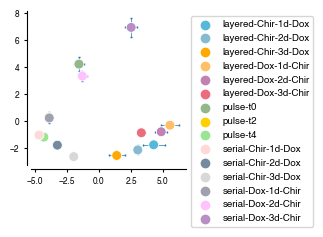

In [27]:
fig, axs = fig, axs = plt.subplots(1,1,figsize=(2,2),sharey=False,sharex=False)
df_plot = df_new#[df_new['val'].str.contains('pulse')==False]
g=sns.scatterplot(data = df_plot, x='A_mean', y='B_mean',hue='val',s=50,\
                palette=["#55B8D8",  # Aquatic Blue
    "#86BAD1",  # Muted Gray
    "#FFA900",  # Vintage Orange
    "#FFBF67",  # Warm Beige
    "#C181B3",  # Faded Lavender
    "#EA6C7D",  # Soft Coral
    "#94B78A",  # Dusty Green
    "#FFD000",  # Mustard Yellow
    "#98E594",  # Minty Green
    "#FFD8D8",  # Blush Pink
    "#758AA0",  # Slate Gray
    "#D8D8D8",  # Pale Gray
    "#A0A0B0",  # Silver
    "#FFC2FF",  # Soft Lilac
    "#B78FC5"]   # Lavender Purple
                ,ax=axs)

g.legend(loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 7})
# axs.set_ylim(-7,7)
# axs.set_xlim(-7,7)
sns.despine(offset=3)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in axs.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
axs.errorbar(x_coords, y_coords, xerr =df_plot['A_std'],  yerr=df_plot['B_std'], fmt=' ', zorder=-1,\
            elinewidth=0.5, capsize=1)


axs.set_xlabel('')
axs.set_ylabel('')
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure4/fig/Fig_4e_scatter_v2.pdf')